### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")
x_project = np.load("Xtest_Classification1.npy")

print(x.shape)
print(y.shape)

{0.0: 5358, 1.0: 896}
{0.0: 6705, 1.0: 1113}
(6254, 2352)
(6254,)


In [ ]:
database2_x = np.load("database2_x.npy")
database2_y = np.load("database2_y.npy")

database2_x = database2_x.reshape(7818, -1)

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(database2_y, return_counts=True)
print(dict(zip(unique, counts)))
print(x.shape)
print(y.shape)

In [4]:
database2_x = database2_x[database2_y == 1]
database2_y = database2_y[database2_y == 1]

x = np.concatenate([(x).astype('float32')/255.0, (database2_x).astype('float32')/255.0], axis=0)
y = np.concatenate([y, database2_y], axis=0)

x = x.reshape(-1, 28,28,3)

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 5358, 1.0: 2009}


In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=180,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

augmented_data = []
augmented_labels = []

for i in range(x.shape[0]):
    img = x[i]
    label = y[i]
    if label == 0:
        continue
    img = img.reshape((1,) + img.shape)  # Reshape the image for flow method
    label = np.array([label])  # Convert label to numpy array
    for batch in datagen.flow(img, label, batch_size=1):
        augmented_data.append(batch[0][0])  # Extract augmented image
        augmented_labels.append(batch[1][0])  # Extract augmented label
        break  # Exit the loop after one iteration to avoid infinite loop

In [6]:
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)


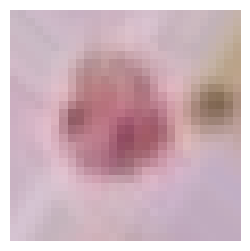

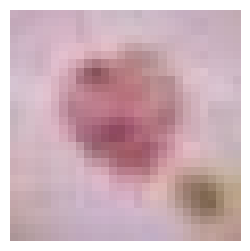

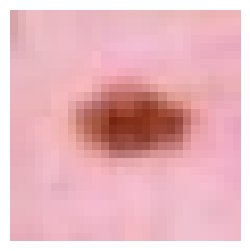

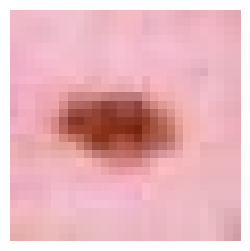

In [7]:
for i in range(2):
    color_image = np.stack([augmented_data[i][:,:,0], augmented_data[i][:,:,1], augmented_data[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
    color_image = np.stack([x[i][:,:,0], x[i][:,:,1], x[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
 

In [11]:
final_x = np.concatenate((x, augmented_data), axis=0)
final_y = np.concatenate((y, augmented_labels), axis=0)

final_y = tf.keras.utils.to_categorical(final_y,2)

print(final_x.shape)
print(final_y.shape)

np.save('final_x.npy', final_x)
np.save('final_y.npy', final_y)

(9376, 28, 28, 3)
(9376, 2)
